What are bloom filters

Bloom filter is a type of a data structure. An empty bloom filter would be a bit array, consisting of zeros. Using multiple hash functions on an item we can determine the index at the bloom filter of an item and populate the empty data structure. An important properties of bloom filter are its probabilistic and space-efficient nature. Probabilistic in this context means that when we are trying to determine whether an item is within the bloom filter, we only get the answer that there is a probability that there is an item in the data structure and we are never 100% sure. Space efficient means that it takes relatively small amount of time to both add and sort through the bloom filter. Given k hash functions were used to determine the location of an index, the time complexity of search and add operations is O(k).


Murmur Hash

It is a hashing function that is not difficult to reverse, thus not suitable for cryptographic usages.  The way the murmur hashing works is first the hash looks at strings in 32 block bits, each block consists of four letters.  Next, the hash function converts the string into the hexadecimal notation and shifts each element appropriately in a way that after each element is added we receive a 4 bite block (eg. The letters ‘abcd’ in a string would be converted first to OX61, OX62, OX,63 and X64, next the string will be shifted in a way that we receive OX61626364). Next the string partitioned into those blocks will be multiplied by a constant and shifted by another constant in a way that will exchange the items at the beginning of the converted hexadecimal value with the items at the end. The hash function repeats the multiplication process by another constant and shifts the items again. After 32bit block will be multiplied and shifted appropriately the function will revert to remaining items of the string that did not form 32 bite unit and will shift the items and next repeat the process of multiplying by constant and shifting. Finally, there are few multiplications and shifts performed on all items of the string to be hashed at the same time that consist of multiplication and shifting. 


Scaling of memory size as a function of the false positive rate

60B - 0.1 
42B - 0.2 
31B - 0.3 
24B - 0.4 
18B - 0.5 
13B - 0.6

I used the following calculator to arrive at the values: https://hur.st/bloomfilter?n=100&p=0.6 

The shape of the graph is resembling an exponential decay graph,
there is a negative correlation between memory size and fase positive rate

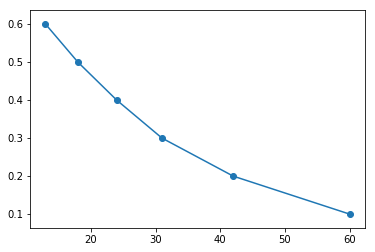

In [491]:
x = [60,42,31,24,18,13]
y = [0.1,0.2,0.3,0.4,0.5,0.6]
matplotlib.pyplot.scatter(x, y)
plt.plot(x, y)
plt.show()

Scaling of access time as a function of the number of items stored

80 - 7.00950622559e-05
60 - 7.20024108887e-05
40 - 8.51154327393e-05
20 - 9.3936920166e-05

I used the following code to arrive at the values, at values
of items added 20,40,60 and 80
    
import timeit
start = timeit.default_timer()
check("fur")
stop = timeit.default_timer()
print stop - start 

The graph has a linear shape, thus the access time does not
scale with relation to number of items stored

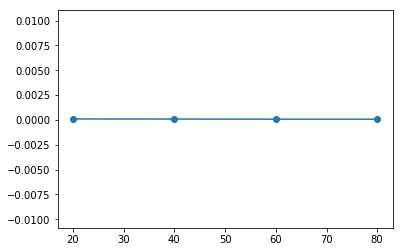

In [490]:
x = [20,40,60,80]
y = [9.3936920166e-05,8.51154327393e-05,7.20024108887e-05,7.00950622559e-05]
matplotlib.pyplot.scatter(x, y)
plt.plot(x, y)
plt.show()

Scaling of access time as a function of the false positive rate

0.05 - 9.29832458496e-05
0.2 - 8.39233398438e-05
0.3 - 9.3936920166e-05
0.4 - 8.89301300049e-05
0.5 - 8.60691070557e-05

I used the following code to arrive at the values:
    
import timeit
start = timeit.default_timer()
check("fur")
stop = timeit.default_timer()
print stop - start 

The shape of the graph shows that the rate of false positive 
does not scale with time

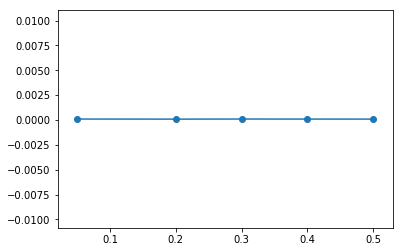

In [480]:
x = [0.05,0.2,0.3,0.4,0.5]
y = [9.29832458496e-05,8.39233398438e-05,9.3936920166e-05,
    8.89301300049e-05,8.60691070557e-05]

matplotlib.pyplot.scatter(x, y)
plt.plot(x, y)
plt.show()

Scaling of memory size as a function of the number of items stored.

4090B - 10,000
419B - 1,000
42B - 100
4B - 10
1B - 1

I used the following calculator to arrive at the values: https://hur.st/bloomfilter?n=100000&p=0.2 

The graph below illustrates how memory scales with number of items 
stored in a bloom filter given probability of false positive equal to 0.2.
The shape is approximately exponential. 

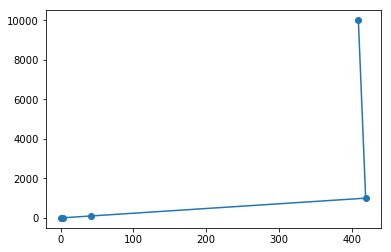

In [470]:
x = [1,4,42,419,409]
y = [1,10,100,1000,10000]
matplotlib.pyplot.scatter(x, y)
plt.plot(x, y)
plt.show()

In [492]:
import math, mmh3, hashlib, random
from bitarray import bitarray

fp_count = 0

def size(insert,probability_false_positive):
    size = int(math.ceil((insert * math.log(probability_false_positive)) / math.log(1.0 / (pow(2.0, math.log(2.0))))))
    return size

bit_array = bitarray(size(20,0.5))
bit_array.setall(0)

def add(item):
    for i in range(1):
        index = mmh3.hash(item, i) % size(20,0.5) #hash function index/digest
        bit_array[index] = True
        #print index,bit_array
          
def check(item):
    for i in range(2):
        digest = mmh3.hash(item) % size(20,0.5)
        if bit_array[mmh3.hash(item) % size(20,0.5)] == False:
            return False
        return True
    
allergy = ['fur', 'milk', 'chocolate', 'pollen', 'eggs', 'gluten', 'wheat',
            'rye', 'barley','nuts','fish','fish oil','sea food','beans',
           'mustard','soy beans','lupin','molluscs','celery','peanuts']

diet_recommendation = ['milk', 'potatos', 'cilantro', 'papaya', 'spinnach', 'wheat',
            'water', 'barley','cashew','apples']

for item in allergy:
    add(item)
    if bit_array[mmh3.hash(item) % size(20,0.5)] == 1:
        print('{} - allergen'.format(item))
        
print (" ")
    
for item2 in diet_recommendation:
    probab = random.uniform(0, 1)
    if probab <0.5:
        print('{} false positive'.format(item2))
        fp_count +=1
    elif bit_array[mmh3.hash(item2) % size(20,0.5)] == 0:
        print('{} NOT in bloom filter'.format(item2))   
        
print fp_count/10.

fur - allergen
milk - allergen
chocolate - allergen
pollen - allergen
eggs - allergen
gluten - allergen
wheat - allergen
rye - allergen
barley - allergen
nuts - allergen
fish - allergen
fish oil - allergen
sea food - allergen
beans - allergen
mustard - allergen
soy beans - allergen
lupin - allergen
molluscs - allergen
celery - allergen
peanuts - allergen
 
milk false positive
potatos false positive
cilantro NOT in bloom filter
papaya false positive
cashew false positive
apples NOT in bloom filter
0.4


0.486206896552


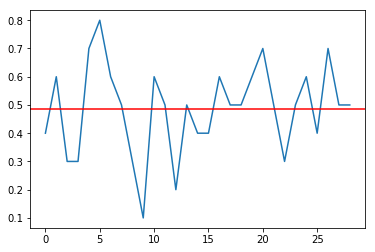

In [460]:
#Visualization of 30 values of false positive 
import matplotlib
%matplotlib inline

false_positive = [0.4,0.6,0.3,0.3,0.7,0.8,0.6,0.5, 0.3,0.1,0.6,0.5,0.2,
     0.5,0.4,0.4,0.6,0.5,0.5,0.6,0.7,0.5,0.3,0.5,0.6,0.4, 0.7,0.5,
     0.5]

print np.mean(false_positive)
plt.plot(false_positive)
plt.axhline(y=np.mean(false_positive), color='r', linestyle='-')
plt.show()